<a href="https://colab.research.google.com/github/BeltwayData/Ukraine_ACLED_Data_Science_Attack_Exploration/blob/main/PYSPARK_ACLED_PRAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 20.1 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=e1fe11425d495932174f580340f9f68913999af4b42291ae6433834952863afc
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

# create Spark session
spark = SparkSession.builder.appName("CSV to DataFrame").getOrCreate()

# read complex JSON data into a DataFrame
df = spark.read.csv("/content/2021-10-01-2022-10-30-Ukraine.csv", multiLine=True)

# show the dataframe
df.show()

+-------+---+-------------+----------------+---------------+----+--------------+--------------------+--------------------+--------------------+-------------+------+--------------------+--------------------+------+-----------+------+-------+---------+------------------+-------------------+--------------------+--------+---------+-------------+--------------------+------------+--------------------+----------+----------+----+
|    _c0|_c1|          _c2|             _c3|            _c4| _c5|           _c6|                 _c7|                 _c8|                 _c9|         _c10|  _c11|                _c12|                _c13|  _c14|       _c15|  _c16|   _c17|     _c18|              _c19|               _c20|                _c21|    _c22|     _c23|         _c24|                _c25|        _c26|                _c27|      _c28|      _c29|_c30|
+-------+---+-------------+----------------+---------------+----+--------------+--------------------+--------------------+--------------------+-----

In [ ]:
mydata = spark.read.format("csv").option("header", "true").load("/content/2021-10-01-2022-10-30-Ukraine.csv")

In [ ]:
mydata.show()

+-------+---+-------------+----------------+---------------+----+--------------+--------------------+--------------------+--------------------+-------------+------+--------------------+--------------------+------+-----------+------+-------+---------+------------------+-------------------+--------------------+--------+---------+-------------+--------------------+------------+--------------------+----------+----------+----+
|data_id|iso|event_id_cnty|event_id_no_cnty|     event_date|year|time_precision|          event_type|      sub_event_type|              actor1|assoc_actor_1|inter1|              actor2|       assoc_actor_2|inter2|interaction|region|country|   admin1|            admin2|             admin3|            location|latitude|longitude|geo_precision|              source|source_scale|               notes|fatalities| timestamp|iso3|
+-------+---+-------------+----------------+---------------+----+--------------+--------------------+--------------------+--------------------+-----

In [ ]:
from pyspark.sql.functions import *
mydata2 = mydata.withColumn("clean_assoc_actor_1", when(mydata.assoc_actor_1.isNull(), 'unknown').otherwise(mydata.assoc_actor_1))

In [ ]:
mydata2.show()

+-------+---+-------------+----------------+---------------+----+--------------+--------------------+--------------------+--------------------+-------------+------+--------------------+--------------------+------+-----------+------+-------+---------+------------------+-------------------+--------------------+--------+---------+-------------+--------------------+------------+--------------------+----------+----------+----+-------------------+
|data_id|iso|event_id_cnty|event_id_no_cnty|     event_date|year|time_precision|          event_type|      sub_event_type|              actor1|assoc_actor_1|inter1|              actor2|       assoc_actor_2|inter2|interaction|region|country|   admin1|            admin2|             admin3|            location|latitude|longitude|geo_precision|              source|source_scale|               notes|fatalities| timestamp|iso3|clean_assoc_actor_1|
+-------+---+-------------+----------------+---------------+----+--------------+--------------------+-------

In [ ]:
mydata2.dtypes

[('data_id', 'string'),
 ('iso', 'string'),
 ('event_id_cnty', 'string'),
 ('event_id_no_cnty', 'string'),
 ('event_date', 'string'),
 ('year', 'string'),
 ('time_precision', 'string'),
 ('event_type', 'string'),
 ('sub_event_type', 'string'),
 ('actor1', 'string'),
 ('assoc_actor_1', 'string'),
 ('inter1', 'string'),
 ('actor2', 'string'),
 ('assoc_actor_2', 'string'),
 ('inter2', 'string'),
 ('interaction', 'string'),
 ('region', 'string'),
 ('country', 'string'),
 ('admin1', 'string'),
 ('admin2', 'string'),
 ('admin3', 'string'),
 ('location', 'string'),
 ('latitude', 'string'),
 ('longitude', 'string'),
 ('geo_precision', 'string'),
 ('source', 'string'),
 ('source_scale', 'string'),
 ('notes', 'string'),
 ('fatalities', 'string'),
 ('timestamp', 'string'),
 ('iso3', 'string'),
 ('clean_assoc_actor_1', 'string')]

In [ ]:
from pyspark.sql.types import *
schema = StructType([
    StructField('data_id', IntegerType()),
    StructField('iso', IntegerType()),
    StructField('event_id_cnty', StringType()),
    StructField('event_id_no_cnty', IntegerType()),
    StructField('event_date', StringType()),
    StructField('year', IntegerType()),
    StructField('time_precision', StringType()),
    StructField('event_type', StringType()),
    StructField('sub_event_type', StringType()),
    StructField('actor1', StringType()),
    StructField('assoc_actor_1', StringType()),
    StructField('inter1', StringType()),
    StructField('actor2', StringType()),
    StructField('assoc_actor_2', StringType()),
    StructField('inter2', StringType()),
    StructField('interaction', StringType()),
    StructField('region', StringType()),
    StructField('country', StringType()),
    StructField('admin1', StringType()),
    StructField('admin2', StringType()),
    StructField('admin3', StringType()),
    StructField('location', StringType()),
    StructField('latitude', FloatType()),
    StructField('longitude', FloatType()),
    StructField('geo_precision', StringType()),
    StructField('source', StringType()),
    StructField('source_scale', StringType()),
    StructField('notes', StringType()),
    StructField('fatalities', StringType()),
    StructField('timestamp', StringType()),
    StructField('iso3', StringType()),
    StructField('clean_assoc_actor_1', StringType()),
])



In [ ]:
df = spark.read.csv("/content/2021-10-01-2022-10-30-Ukraine.csv", header=True, schema=schema)

# show the dataframe
df.show()

+-------+---+-------------+----------------+---------------+----+--------------+--------------------+--------------------+--------------------+-------------+------+--------------------+--------------------+------+-----------+------+-------+---------+------------------+-------------------+--------------------+--------+---------+-------------+--------------------+------------+--------------------+----------+----------+----+-------------------+
|data_id|iso|event_id_cnty|event_id_no_cnty|     event_date|year|time_precision|          event_type|      sub_event_type|              actor1|assoc_actor_1|inter1|              actor2|       assoc_actor_2|inter2|interaction|region|country|   admin1|            admin2|             admin3|            location|latitude|longitude|geo_precision|              source|source_scale|               notes|fatalities| timestamp|iso3|clean_assoc_actor_1|
+-------+---+-------------+----------------+---------------+----+--------------+--------------------+-------

In [ ]:
df.head(1)

[Row(data_id=9585171, iso=804, event_id_cnty='UKR77808', event_id_no_cnty=77808, event_date='21 October 2022', year=2022, time_precision='1', event_type='Explosions/Remote violence', sub_event_type='Shelling/artillery/missile attack', actor1='Military Forces of Ukraine (2019-)', assoc_actor_1=None, inter1='1', actor2='Military Forces of Russia (2000-)', assoc_actor_2='Civilians (Ukraine); Russian Occupation Government (Ukraine)', inter2='8', interaction='18', region='Europe', country='Ukraine', admin1='Kherson', admin2='Khersonskyi', admin3='Hersonska', location='Kherson', latitude=46.655799865722656, longitude=32.617801666259766, geo_precision='1', source='24 Channel', source_scale='National', notes='On 21 October 2022, Ukrainian forces shelled Russian occupation officials and military officers on the Antonovsky Bridge in Kherson, Kherson. Russian sources claim civilians were shelled. Casualties unknown.', fatalities='0', timestamp='1666712169', iso3='UKR', clean_assoc_actor_1=None)]

In [ ]:
df.first()

Row(data_id=9585171, iso=804, event_id_cnty='UKR77808', event_id_no_cnty=77808, event_date='21 October 2022', year=2022, time_precision='1', event_type='Explosions/Remote violence', sub_event_type='Shelling/artillery/missile attack', actor1='Military Forces of Ukraine (2019-)', assoc_actor_1=None, inter1='1', actor2='Military Forces of Russia (2000-)', assoc_actor_2='Civilians (Ukraine); Russian Occupation Government (Ukraine)', inter2='8', interaction='18', region='Europe', country='Ukraine', admin1='Kherson', admin2='Khersonskyi', admin3='Hersonska', location='Kherson', latitude=46.655799865722656, longitude=32.617801666259766, geo_precision='1', source='24 Channel', source_scale='National', notes='On 21 October 2022, Ukrainian forces shelled Russian occupation officials and military officers on the Antonovsky Bridge in Kherson, Kherson. Russian sources claim civilians were shelled. Casualties unknown.', fatalities='0', timestamp='1666712169', iso3='UKR', clean_assoc_actor_1=None)

In [ ]:
import seaborn as sns
sns.set()

In [ ]:
import pandas as pd

pd.options.display.max_rows = 10

df = pd.read_csv('/content/2021-10-01-2022-10-30-Ukraine.csv')

print(df) 

       data_id  iso event_id_cnty  event_id_no_cnty       event_date  year  \
0      9585171  804      UKR77808             77808  21 October 2022  2022   
1      9585373  804      UKR77763             77763  21 October 2022  2022   
2      9585379  804      UKR77762             77762  21 October 2022  2022   
3      9585383  804      UKR77764             77764  21 October 2022  2022   
4      9585650  804      UKR77814             77814  21 October 2022  2022   
...        ...  ...           ...               ...              ...   ...   
29683  8581951  804      UKR48103             48103  01 October 2021  2021   
29684  8581963  804      UKR48097             48097  01 October 2021  2021   
29685  9172111  804      UKR48043             48043  01 October 2021  2021   
29686  9172112  804      UKR48143             48143  01 October 2021  2021   
29687  9487063  804      UKR48107             48107  01 October 2021  2021   

       time_precision                  event_type  \
0         

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


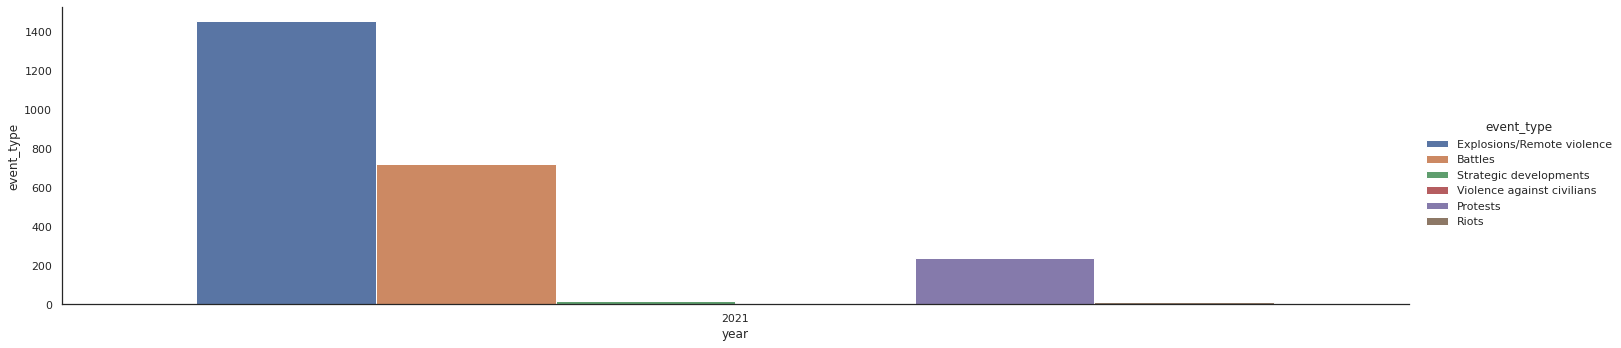

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=df, aspect=4.0, kind='count',
                       hue='event_type', order=range(2021, 2022))
    g.set_ylabels('event_type')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


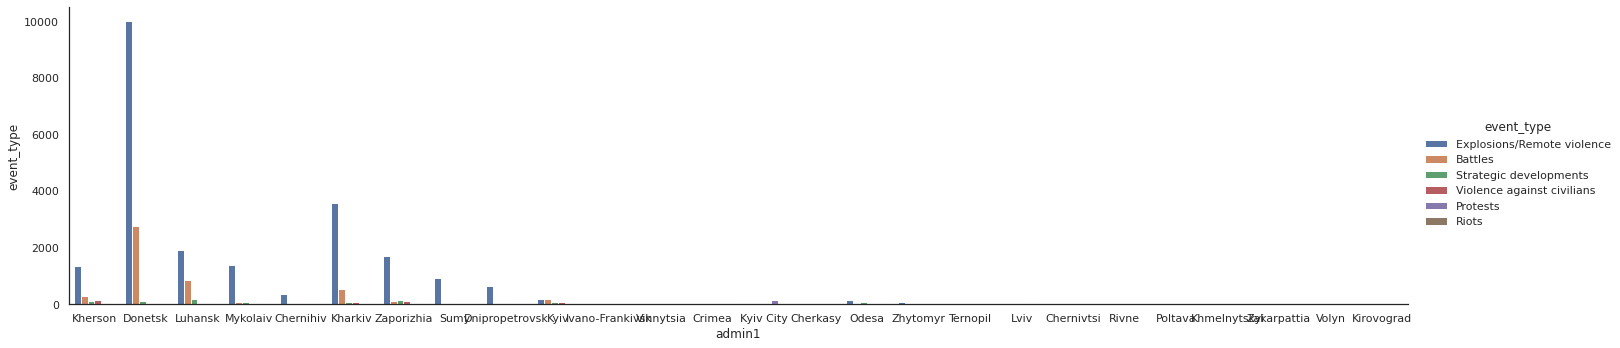

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("admin1", data=df, aspect=4.0, kind='count',
                       hue='event_type')
    g.set_ylabels('event_type')

In [ ]:
import matplotlib.pyplot as plt

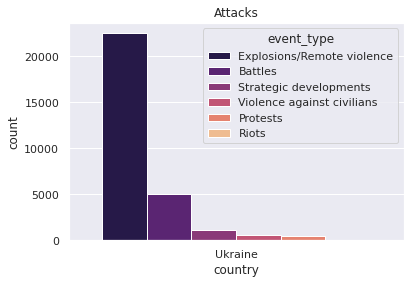

In [ ]:
sns.countplot(x = 'country', hue = 'event_type', data = df, palette = 'magma')
plt.title('Attacks')
plt.show()